## Table of Contents

### 1. Importing libraries and data
### 2. Public institutions
##### 1. Data preprocessing
##### 2. Elbow technique
##### 3. K-means clustering
### 3. Private, non-profit institutions
##### 1. Data preprocessing
##### 2. Elbow technique
##### 3. K-means clustering

# 01. Importing libraries and data

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as pl
from sklearn.preprocessing import StandardScaler

In [2]:
# Ensure charts show in notebook
%matplotlib inline

In [3]:
# Define path
path = r'/Users/taraperrigeold/Documents/Documents - Tara Perrige’s MacBook Pro/CareerFoundry/College Cost Analysis'

In [4]:
# Check output
path

'/Users/taraperrigeold/Documents/Documents - Tara Perrige’s MacBook Pro/CareerFoundry/College Cost Analysis'

In [5]:
# Import data for public institutions
public = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'public_data.pkl'))

In [6]:
# Check head
public.head()

,UNITID,NAME,CITY,STATE,ZIP,REGION,LOCALE,COSTT4_A,DEBT_MDN,FAMINC,ADM_RATE,SAT_AVG,UGDS,RET_FT4_POOLED,UGDS_WHITE,COST_CATEGORY
0,100654,Alabama A & M University,Normal,AL,35762,5,12.0,22489.0,15500.0,32362.826114,0.8986,957.0,4990.0,0.5978,0.0186,Higher cost
1,100663,University of Alabama at Birmingham,Birmingham,AL,35294-0110,5,12.0,24347.0,15000.0,51306.674306,0.9211,1220.0,13186.0,0.8303,0.5717,Higher cost
2,100706,University of Alabama in Huntsville,Huntsville,AL,35899,5,12.0,23441.0,14476.0,61096.588949,0.8087,1314.0,7458.0,0.8269,0.7167,Higher cost
3,100724,Alabama State University,Montgomery,AL,36104-0271,5,12.0,21476.0,18679.0,31684.382188,0.9774,972.0,3903.0,0.5898,0.0167,Higher cost
4,100751,The University of Alabama,Tuscaloosa,AL,35487-0100,5,12.0,29424.0,17500.0,91846.749624,0.5906,1252.0,32177.0,0.8748,0.7774,Higher cost


In [7]:
# Check shape
public.shape

(1449, 16)

In [8]:
# Import data set for private, non-profit institutions
private = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'private_data.pkl'))

In [9]:
# Check head
private.head()

,UNITID,NAME,CITY,STATE,ZIP,REGION,LOCALE,COSTT4_A,NPT4_PRIV,DEBT_MDN,FAMINC,ADM_RATE,SAT_AVG,UGDS,RET_FT4_POOLED,UGDS_WHITE,COST_CATEGORY
0,100937,Birmingham-Southern College,Birmingham,AL,35254,5,12.0,52176.0,25494.0,18500.0,86672.871041,0.5666,1232.0,1265.0,0.7769,0.7858,Middle cost
1,101189,Faulkner University,Montgomery,AL,36109-3390,5,12.0,33944.0,25557.0,14925.0,36952.206116,0.5227,1069.0,2079.0,0.5611,0.4238,Middle cost
2,101365,Herzing University-Birmingham,Birmingham,AL,35209,5,21.0,26128.0,17906.0,12233.0,26184.228503,0.9500,NaN,544.0,0.5000,0.2813,Middle cost
3,101435,Huntingdon College,Montgomery,AL,36106-2148,5,12.0,35685.0,20136.0,16250.0,53792.633136,0.5841,1100.0,1078.0,0.6602,0.6503,Middle cost
4,101541,Judson College,Marion,AL,36756,5,43.0,31735.0,16619.0,14112.0,28123.817955,0.4820,1054.0,259.0,0.5973,0.6988,Middle cost


In [10]:
# Check shape
private.shape

(1402, 17)

# 02. Public institutions

## 01. Data preprocessing

In [11]:
# Rename columns
public.rename(columns = {'COSTT4_A' : 'AVG_COST', 'UGDS' : 'NUM_STUDENTS', 'RET_FT4_POOLED' : 'RET_RATE', 'UGDS_WHITE' : 'PCT_WHITE'}, inplace = True)

In [12]:
# Check output
public.head()

,UNITID,NAME,CITY,STATE,ZIP,REGION,LOCALE,AVG_COST,DEBT_MDN,FAMINC,ADM_RATE,SAT_AVG,NUM_STUDENTS,RET_RATE,PCT_WHITE,COST_CATEGORY
0,100654,Alabama A & M University,Normal,AL,35762,5,12.0,22489.0,15500.0,32362.826114,0.8986,957.0,4990.0,0.5978,0.0186,Higher cost
1,100663,University of Alabama at Birmingham,Birmingham,AL,35294-0110,5,12.0,24347.0,15000.0,51306.674306,0.9211,1220.0,13186.0,0.8303,0.5717,Higher cost
2,100706,University of Alabama in Huntsville,Huntsville,AL,35899,5,12.0,23441.0,14476.0,61096.588949,0.8087,1314.0,7458.0,0.8269,0.7167,Higher cost
3,100724,Alabama State University,Montgomery,AL,36104-0271,5,12.0,21476.0,18679.0,31684.382188,0.9774,972.0,3903.0,0.5898,0.0167,Higher cost
4,100751,The University of Alabama,Tuscaloosa,AL,35487-0100,5,12.0,29424.0,17500.0,91846.749624,0.5906,1252.0,32177.0,0.8748,0.7774,Higher cost


In [13]:
# Check column types
public.dtypes

UNITID             int64
NAME              object
CITY              object
STATE             object
ZIP               object
REGION             int64
LOCALE           float64
AVG_COST         float64
DEBT_MDN         float64
FAMINC           float64
ADM_RATE         float64
SAT_AVG          float64
NUM_STUDENTS     float64
RET_RATE         float64
PCT_WHITE        float64
COST_CATEGORY     object
dtype: object

In [14]:
# Remove non-numerical columns, as well as UNITID, REGION, and LOCALE which are only stored as a numbers
public.drop(columns = ['UNITID', 'NAME', 'CITY', 'STATE', 'ZIP', 'REGION', 'LOCALE', 'COST_CATEGORY'], inplace = True)

In [15]:
# Check output
public.head()

,AVG_COST,DEBT_MDN,FAMINC,ADM_RATE,SAT_AVG,NUM_STUDENTS,RET_RATE,PCT_WHITE
0,22489.0,15500.0,32362.826114,0.8986,957.0,4990.0,0.5978,0.0186
1,24347.0,15000.0,51306.674306,0.9211,1220.0,13186.0,0.8303,0.5717
2,23441.0,14476.0,61096.588949,0.8087,1314.0,7458.0,0.8269,0.7167
3,21476.0,18679.0,31684.382188,0.9774,972.0,3903.0,0.5898,0.0167
4,29424.0,17500.0,91846.749624,0.5906,1252.0,32177.0,0.8748,0.7774


In [16]:
# Check for missing values
public.isnull().sum()

AVG_COST          0
DEBT_MDN          0
FAMINC            0
ADM_RATE        906
SAT_AVG         961
NUM_STUDENTS      0
RET_RATE        843
PCT_WHITE         0
dtype: int64

In [17]:
# Drop rows where SAT_AVG is missing (too many to impute)
public = public[public['SAT_AVG'].notnull()]

In [18]:
# Check missing numbers again
public.isnull().sum()

AVG_COST        0
DEBT_MDN        0
FAMINC          0
ADM_RATE        0
SAT_AVG         0
NUM_STUDENTS    0
RET_RATE        7
PCT_WHITE       0
dtype: int64

In [19]:
# Impute median for missing values for 
public['RET_RATE'].fillna(public['RET_RATE'].median(), inplace = True)

In [20]:
# Check missing values again
public.isnull().sum()

AVG_COST        0
DEBT_MDN        0
FAMINC          0
ADM_RATE        0
SAT_AVG         0
NUM_STUDENTS    0
RET_RATE        0
PCT_WHITE       0
dtype: int64

In [21]:
# Check for duplicates
dups_pub = public[public.duplicated()]

In [22]:
# Show output
dups_pub.shape

(0, 8)

In [23]:
# Show descriptive stats
public.describe()

,AVG_COST,DEBT_MDN,FAMINC,ADM_RATE,SAT_AVG,NUM_STUDENTS,RET_RATE,PCT_WHITE
count,488.000000,488.000000,488.000000,488.000000,488.00000,488.000000,488.000000,488.000000
mean,22203.520492,14973.649590,60667.149022,0.711921,1120.77459,10028.053279,0.759557,0.568117
std,4500.209261,3348.539958,19333.886572,0.173140,101.13109,8777.397133,0.092057,0.239896
min,6646.000000,4500.000000,18894.154741,0.219000,865.00000,223.000000,0.478500,0.000000
25%,19294.750000,12615.250000,47123.307247,0.602500,1050.00000,3144.250000,0.705075,0.445025
50%,22094.000000,15000.000000,58635.807283,0.743300,1111.00000,7045.500000,0.758600,0.637500
75%,24856.000000,17238.000000,74783.111686,0.847125,1179.00000,14507.500000,0.822750,0.751800
max,37386.000000,24969.000000,114454.088410,0.999900,1427.00000,37291.000000,0.968500,0.926700


In [24]:
# Save StandardScaler as object
scaler = StandardScaler()

In [25]:
# Standardize public dataframe
public_std = scaler.fit_transform(public)

In [26]:
# Show final shape
public_std.shape

(488, 8)

## 02. Elbow technique

In [27]:
# Define range of potential clusters and define k-means clusters in that range
num_cl = range(1,10)
kmeans = [KMeans(n_clusters = i) for i in num_cl]

In [28]:
# Create score that represents rate of variation for given clusters
score_pub = [kmeans[i].fit(public_std).score(public_std) for i in range(len(kmeans))]

In [29]:
# Show output
score_pub

[-3904.0,
 -2894.9144789846746,
 -2426.261399654561,
 -2117.7009830457996,
 -1931.0036958182384,
 -1766.7770739898415,
 -1657.9002607157402,
 -1565.5668148628838,
 -1492.329572380703]

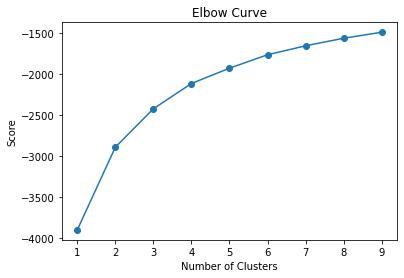

In [30]:
# Plot elbow curve using PyLab
pl.plot(num_cl, score_pub, marker = 'o')
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

I will use 4 clusters because it seems as though the last big 'jump' occurs from 3 to 4. After that, the line looks more horizontal.

## 03. K-means clustering

In [31]:
# Create kmeans object
kmeans_public = KMeans(n_clusters = 4, n_jobs = -1)

In [32]:
# Fit object to the data
kmeans_public.fit(public_std)

/Users/taraperrigeold/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=4, n_jobs=-1)

In [33]:
# Create column with results of clustering
public['clusters'] = kmeans_public.fit_predict(public_std)

/Users/taraperrigeold/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


In [34]:
# Show output
public.head()

,AVG_COST,DEBT_MDN,FAMINC,ADM_RATE,SAT_AVG,NUM_STUDENTS,RET_RATE,PCT_WHITE,clusters
0,22489.0,15500.0,32362.826114,0.8986,957.0,4990.0,0.5978,0.0186,1
1,24347.0,15000.0,51306.674306,0.9211,1220.0,13186.0,0.8303,0.5717,0
2,23441.0,14476.0,61096.588949,0.8087,1314.0,7458.0,0.8269,0.7167,0
3,21476.0,18679.0,31684.382188,0.9774,972.0,3903.0,0.5898,0.0167,1
4,29424.0,17500.0,91846.749624,0.5906,1252.0,32177.0,0.8748,0.7774,3


In [35]:
# Get value counts of clusters
public['clusters'].value_counts(dropna = False)

2    184
0    132
1     92
3     80
Name: clusters, dtype: int64

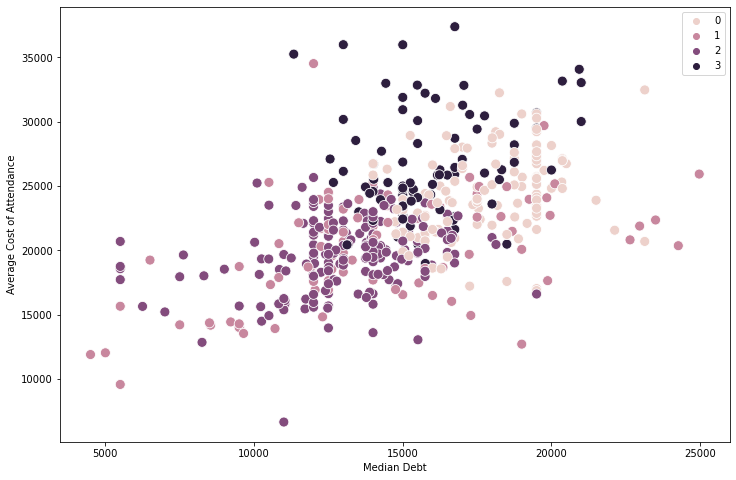

In [36]:
# Plot AVG_COST and DEBT_MDN
plt.figure(figsize = (12,8))
ax = sns.scatterplot(x = public['DEBT_MDN'], y = public['AVG_COST'], hue = kmeans_public.labels_, s = 100)
ax.grid(False)
plt.xlabel('Median Debt')
plt.ylabel('Average Cost of Attendance')
plt.show()

The dark pink cluster (1) seems to have lower average cost of attendance, but median debt across the board. The darker purple cluster (3) seems to have high median debt and higher average cost of attendance. The light pink cluster (0) seems to have higher median debt and higher average cost of attendance, but not as much as the darker purple cluster. The lighter purple cluster (2) seems to generally have lower median debt and lower average cost of attendance than the other clusters.

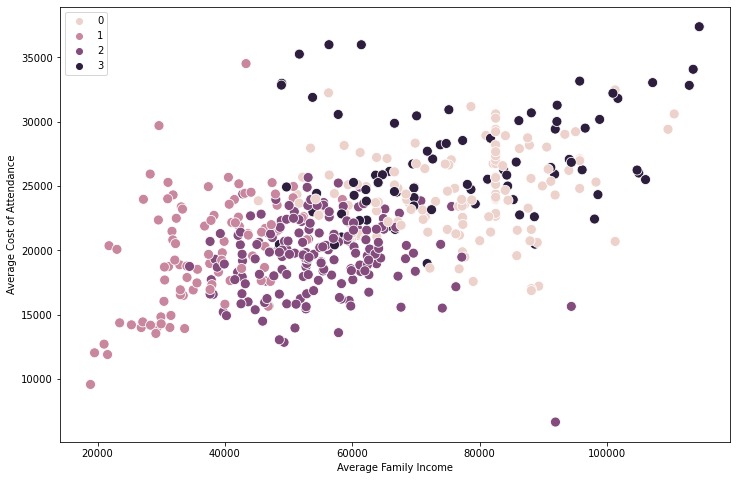

In [37]:
# Plot AVG_COST and FAMINC
plt.figure(figsize = (12,8))
ax = sns.scatterplot(x = public['FAMINC'], y = public['AVG_COST'], hue = kmeans_public.labels_, s = 100)
ax.grid(False)
plt.xlabel('Average Family Income')
plt.ylabel('Average Cost of Attendance')
plt.show()

The dark pink cluster (1) seems to have the lowest average family income, but more varied average cost of attendance. The lighter purple cluster (2) seems to have lower average family income (but not as low as the dark pink cluster) and has average cost of attendance between 15000 and 25000 for the most part. The light pink cluster (1) has higher average family income than the dark pink and lighter purple clusters, and has average cost of attendance over 20000 for the most part. The darker purple cluster (3) has the highest average family income and the highest average cost of attendance, but also some around the other clusters.

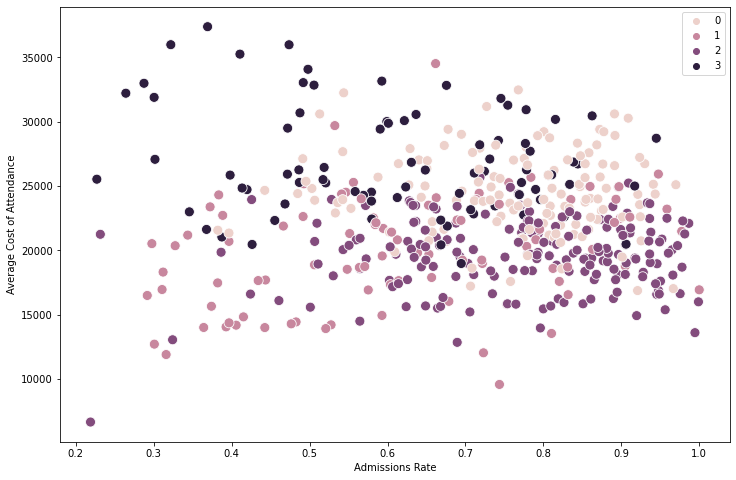

In [38]:
# Plot AVG_COST and ADM_RATE
plt.figure(figsize = (12,8))
ax = sns.scatterplot(x = public['ADM_RATE'], y = public['AVG_COST'], hue = kmeans_public.labels_, s = 100)
ax.grid(False)
plt.xlabel('Admissions Rate')
plt.ylabel('Average Cost of Attendance')
plt.show()

The darker purple cluster (3) has highest average cost of attendance and a wide range of admissions rate. The light pink cluster (0) has slightly lower average cost of attendance than the darker purple cluster (3), but has much higher admissions rates. The lighter purple cluster (2) has slightly lower average cost of attendance than the darker purple (3) and light pink (0) clusters, and tends to have higher admission rates. The dark pink cluster (1) mostly has lower average cost of attendance and has a wide range of admissions rates.

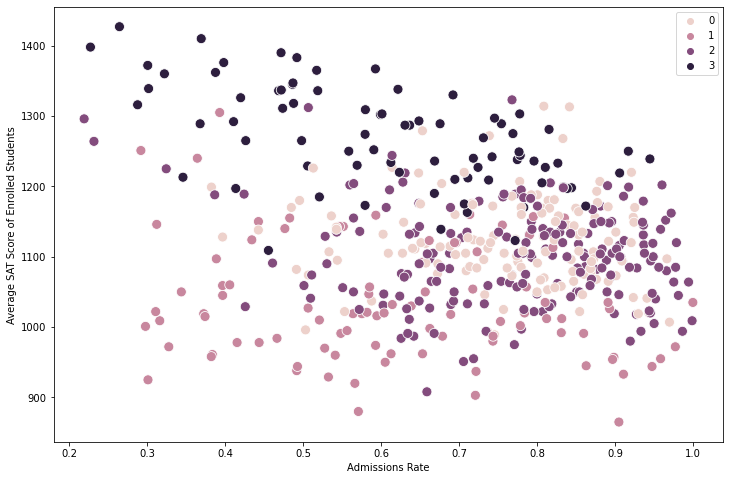

In [39]:
# Plot SAT_AVG and ADM_RATE
plt.figure(figsize = (12,8))
ax = sns.scatterplot(x = public['ADM_RATE'], y = public['SAT_AVG'], hue = kmeans_public.labels_, s = 100)
ax.grid(False)
plt.xlabel('Admissions Rate')
plt.ylabel('Average SAT Score of Enrolled Students')
plt.show()

The darker purple cluster (3) follows a bit of a slight negative linear shape, so there are high average SAT scores for low admissions rates going to slightly lower SAT scores and the highest admissions rates; overall, this cluster seems to have the highest SAT scores. The light pink cluster (0) seems to have middle of the range SAT scores and higher admissions rates. The lighter purple cluster (2) seems to have middle of the range SAT scores and higher admissions rates. The dark pink (1) cluster has the lowest SAT scores with some variability, and a wide range of admissions rates.

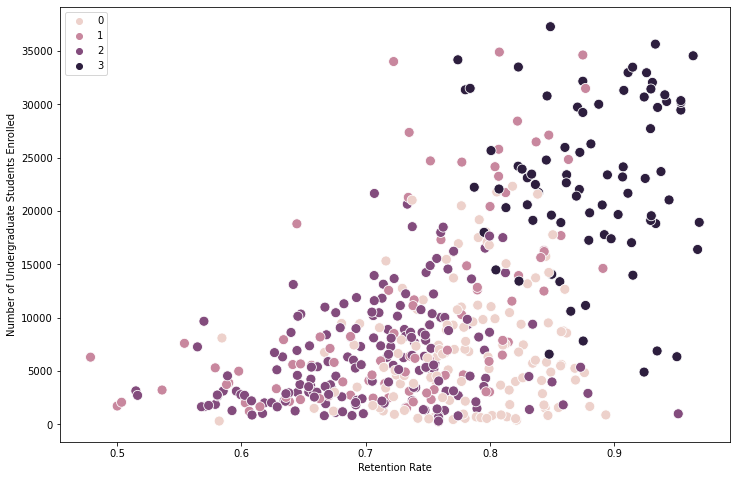

In [40]:
# Plot NUM_STUDENTS and RET_RATE
plt.figure(figsize = (12,8))
ax = sns.scatterplot(x = public['RET_RATE'], y = public['NUM_STUDENTS'], hue = kmeans_public.labels_, s = 100)
ax.grid(False)
plt.xlabel('Retention Rate')
plt.ylabel('Number of Undergraduate Students Enrolled')
plt.show()

The darker purple cluster (3) has the highest retention rates and generally large numbers of undergrad students (with some variability). The light pink cluster (0) has smaller numbers of undergrad students (with some variability) and most retention rates between 0.7 and 0.9. The lighter purple cluster (2) has smaller numbers of undergrad students (with some variability) and retention rates mostly between 0.6 and 0.8. The dark pink cluster (1) is all over the board, however it appears that for the most part, as retention rate increases, so does the number of undergrad students.

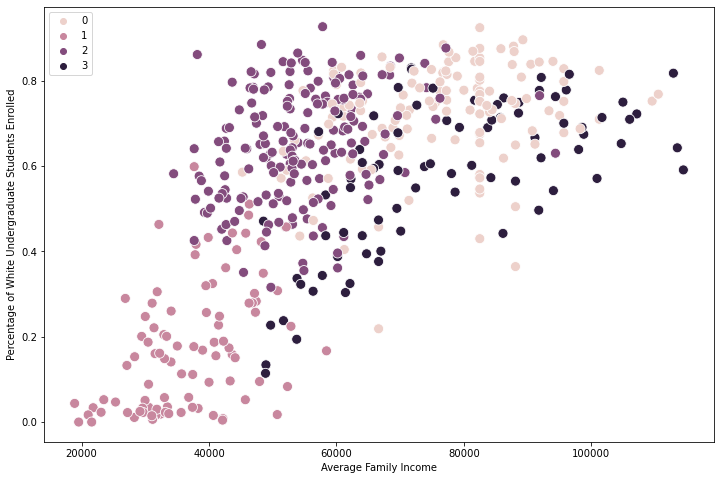

In [41]:
# Plot PCT_WHITE and FAMINC
plt.figure(figsize = (12,8))
ax = sns.scatterplot(x = public['FAMINC'], y = public['PCT_WHITE'], hue = kmeans_public.labels_, s = 100)
ax.grid(False)
plt.xlabel('Average Family Income')
plt.ylabel('Percentage of White Undergraduate Students Enrolled')
plt.show()

The darker purple cluster (3) has an average family income range of 50000 to over 10000, and a wide range of percentage of white students. The light pink cluster (0) has higher family income like the darkest purple cluster, but percentage of white undergrads tends to be above 0.5. The lighter purple cluster (2) has what looks like a middle-class income range of between 40000 to mostly under 70000, and percentage of white undergrads mostly above 0.4. The dark pink cluster (1) has the lowest average family income, mostly below 60000, and lower percentage of white undergrads, below 0.6.

In [42]:
# Make new column of clusters based on color
public.loc[public['clusters'] == 3, 'cluster'] = 'darker purple'
public.loc[public['clusters'] == 2, 'cluster'] = 'lighter purple'
public.loc[public['clusters'] == 1, 'cluster'] = 'dark pink'
public.loc[public['clusters'] == 0, 'cluster'] = 'light pink'

In [43]:
# Get descriptive stats for clusters
public.groupby('cluster').agg({'AVG_COST':['mean', 'median'],
                              'DEBT_MDN':['mean', 'median'],
                              'FAMINC':['mean', 'median'],
                              'ADM_RATE':['mean', 'median'],
                              'SAT_AVG':['mean', 'median'],
                              'NUM_STUDENTS':['mean', 'median'],
                              'RET_RATE':['mean', 'median'],
                              'PCT_WHITE':['mean', 'median']})

AVG_COST               DEBT_MDN                 FAMINC  \
                        mean   median          mean   median          mean   
cluster                                                                      
dark pink       19888.293478  20188.0  13952.228261  13150.0  36886.059466   
darker purple   26909.450000  25963.0  15945.525000  15500.0  77219.864709   
light pink      24518.401515  24323.5  17831.515152  18005.0  76100.048251   
lighter purple  19654.402174  19778.0  13011.597826  13000.0  54289.433185   

                              ADM_RATE               SAT_AVG          \
                      median      mean   median         mean  median   
cluster                                                                
dark pink       37096.629754  0.616643  0.59915  1030.967391  1018.5   
darker purple   74273.599226  0.611271  0.62250  1267.787500  1265.0   
light pink      77285.504450  0.757315  0.77960  1122.750000  1117.0   
lighter purple  53143.272940  0.770755  0.79320  1100.342391  1099.5   

                NUM_STUDENTS           RET_RATE          PCT_WHITE           
                        mean   median      mean   median      mean   median  
cluster                                                                      
dark pink       10382.467391   6355.0  0.727917  0.73820  0.174422  0.15690  
darker purple   23097.100000  23092.0  0.881716  0.87995  0.581311  0.60460  
light pink       7097.325758   6276.5  0.780223  0.77995  0.720194  0.74245  
lighter purple   6271.130435   5237.0  0.707437  0.71370  0.650129  0.65155

The light pink cluster seems to have high average cost of attendance, highest median debt, high/highest average family income, high admissions rate, slightly better average SAT scores, smaller number of students, higher retention rate, and highest percentage of white students.

The darker purple cluster seems to have highest average cost of attendance, higher median debt, high/highest average family income, low/lowest admissions rate, highest average SAT scores, highest number of students, highest retention rate, and slightly lower percentage of white students.

The lighter purple cluster seems to have lowest average cost of attendance, lowest median debt, lower average family income (but still solidly middle-class), highest admissions rate, slightly lower average SAT scores, smaller number of students, lowest retention rate, and slightly higher percentage of white undergrads.

The dark pink cluster seems to have lower average cost of attendance, lower median debt, lowest average family income, low/lowest admissions rate, lowest average SAT scores, slightly smaller number of students, lower retention rate, and lowest percentage of white undergrads.

These clusters do seem to make some sense. The light pink cluster is probably representative of institutions with students from upper middle-class families who are decent students but not the best, who tend to finish their education and go to smaller schools with more white students. This might be the cluster for schools filled with 'upper middle-class white suburban kids with all of the privileges that entails'.

The darker purple cluster is probably representative of the most elite (but larger) private institutions that can be more selective in choosing the students they enroll. 

The lighter purple cluster is probably representative of institutions that have mostly lower-middle-class students. The students who go here were probably brought up to believe they had to go to college, even though it wasn't necessarily a good fit for them and wouldn't have gone if it was 30+ years ago. They're the least likely to stay, maybe due to financial or scholastic difficulties.

The dark pink cluster is probably representative of institutions that cater to their local, relatively lower-income and more racially-diverse, populations. They don't have the best retention rates or SAT scores, but cost and debt are lower (maybe due to governmental financial aid?). The one oddity is that the admissions rate is lower, which is generally more indicative of more selective schools - this might be something to look into.

It would be interesting to take these clusters and see first of all, if my assumptions are accurate, but also if they stand up and are relevant in terms of various other features from the original data set (for example, regarding receiving financial aid, but also repayment which can somewhat indicate the kind of employment students are able to find after graduation). Future next steps could include trying to discover why there is such a large disparity for some of these features (ex. average family income, number of students, percentage of white students).

It's important to note that this was a very small data set (made smaller by removing so many missing values) with outliers removed, which likely had an impact on the results.

# 03. Private, non-profit institutions

## 01. Data preprocessing

In [44]:
# Show head
private.head()

,UNITID,NAME,CITY,STATE,ZIP,REGION,LOCALE,COSTT4_A,NPT4_PRIV,DEBT_MDN,FAMINC,ADM_RATE,SAT_AVG,UGDS,RET_FT4_POOLED,UGDS_WHITE,COST_CATEGORY
0,100937,Birmingham-Southern College,Birmingham,AL,35254,5,12.0,52176.0,25494.0,18500.0,86672.871041,0.5666,1232.0,1265.0,0.7769,0.7858,Middle cost
1,101189,Faulkner University,Montgomery,AL,36109-3390,5,12.0,33944.0,25557.0,14925.0,36952.206116,0.5227,1069.0,2079.0,0.5611,0.4238,Middle cost
2,101365,Herzing University-Birmingham,Birmingham,AL,35209,5,21.0,26128.0,17906.0,12233.0,26184.228503,0.9500,NaN,544.0,0.5000,0.2813,Middle cost
3,101435,Huntingdon College,Montgomery,AL,36106-2148,5,12.0,35685.0,20136.0,16250.0,53792.633136,0.5841,1100.0,1078.0,0.6602,0.6503,Middle cost
4,101541,Judson College,Marion,AL,36756,5,43.0,31735.0,16619.0,14112.0,28123.817955,0.4820,1054.0,259.0,0.5973,0.6988,Middle cost


In [45]:
# Rename columns
private.rename(columns = {'COSTT4_A' : 'AVG_COST', 'NPT4_PRIV' : 'AVG_NET_PRICE', 'UGDS' : 'NUM_STUDENTS', 'RET_FT4_POOLED' : 'RET_RATE', 'UGDS_WHITE' : 'PCT_WHITE'}, inplace = True)

In [46]:
# Check output
private.head()

,UNITID,NAME,CITY,STATE,ZIP,REGION,LOCALE,AVG_COST,AVG_NET_PRICE,DEBT_MDN,FAMINC,ADM_RATE,SAT_AVG,NUM_STUDENTS,RET_RATE,PCT_WHITE,COST_CATEGORY
0,100937,Birmingham-Southern College,Birmingham,AL,35254,5,12.0,52176.0,25494.0,18500.0,86672.871041,0.5666,1232.0,1265.0,0.7769,0.7858,Middle cost
1,101189,Faulkner University,Montgomery,AL,36109-3390,5,12.0,33944.0,25557.0,14925.0,36952.206116,0.5227,1069.0,2079.0,0.5611,0.4238,Middle cost
2,101365,Herzing University-Birmingham,Birmingham,AL,35209,5,21.0,26128.0,17906.0,12233.0,26184.228503,0.9500,NaN,544.0,0.5000,0.2813,Middle cost
3,101435,Huntingdon College,Montgomery,AL,36106-2148,5,12.0,35685.0,20136.0,16250.0,53792.633136,0.5841,1100.0,1078.0,0.6602,0.6503,Middle cost
4,101541,Judson College,Marion,AL,36756,5,43.0,31735.0,16619.0,14112.0,28123.817955,0.4820,1054.0,259.0,0.5973,0.6988,Middle cost


In [47]:
# Get data types of columns
private.dtypes

UNITID             int64
NAME              object
CITY              object
STATE             object
ZIP               object
REGION             int64
LOCALE           float64
AVG_COST         float64
AVG_NET_PRICE    float64
DEBT_MDN         float64
FAMINC           float64
ADM_RATE         float64
SAT_AVG          float64
NUM_STUDENTS     float64
RET_RATE         float64
PCT_WHITE        float64
COST_CATEGORY     object
dtype: object

In [48]:
# Remove non-numerical columns, as well as UNITID, REGION, and LOCALE which are only stored as a numbers
private.drop(columns = ['UNITID', 'NAME', 'CITY', 'STATE', 'ZIP', 'REGION', 'LOCALE', 'COST_CATEGORY'], inplace = True)

In [49]:
# Check output
private.head()

,AVG_COST,AVG_NET_PRICE,DEBT_MDN,FAMINC,ADM_RATE,SAT_AVG,NUM_STUDENTS,RET_RATE,PCT_WHITE
0,52176.0,25494.0,18500.0,86672.871041,0.5666,1232.0,1265.0,0.7769,0.7858
1,33944.0,25557.0,14925.0,36952.206116,0.5227,1069.0,2079.0,0.5611,0.4238
2,26128.0,17906.0,12233.0,26184.228503,0.9500,NaN,544.0,0.5000,0.2813
3,35685.0,20136.0,16250.0,53792.633136,0.5841,1100.0,1078.0,0.6602,0.6503
4,31735.0,16619.0,14112.0,28123.817955,0.4820,1054.0,259.0,0.5973,0.6988


In [50]:
# Check for missing values
private.isnull().sum()

AVG_COST           0
AVG_NET_PRICE      0
DEBT_MDN           0
FAMINC             0
ADM_RATE         274
SAT_AVG          634
NUM_STUDENTS       0
RET_RATE           0
PCT_WHITE          0
dtype: int64

In [51]:
# Drop rows where SAT_AVG is missing (too many to impute)
private = private[private['SAT_AVG'].notnull()]

In [52]:
# Check missing values
private.isnull().sum()

AVG_COST         0
AVG_NET_PRICE    0
DEBT_MDN         0
FAMINC           0
ADM_RATE         0
SAT_AVG          0
NUM_STUDENTS     0
RET_RATE         0
PCT_WHITE        0
dtype: int64

In [53]:
# Check for duplicates
dups_priv = private[private.duplicated()]

In [54]:
# Check dups_priv
dups_priv.shape

(0, 9)

In [55]:
# Show descriptive stats
private.describe()

,AVG_COST,AVG_NET_PRICE,DEBT_MDN,FAMINC,ADM_RATE,SAT_AVG,NUM_STUDENTS,RET_RATE,PCT_WHITE
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,45939.281250,23460.290365,17534.222656,72572.112752,0.634095,1148.290365,2223.440104,0.760764,0.594090
std,12931.413497,6339.335438,4198.252404,23694.681951,0.209666,132.467635,2356.535974,0.119263,0.196750
min,12714.000000,1964.000000,4242.000000,21952.625348,0.043600,809.000000,23.000000,0.386000,0.000000
25%,37387.250000,19298.250000,15000.000000,55287.556057,0.518425,1060.750000,884.000000,0.686150,0.493075
50%,44440.500000,22512.000000,18000.000000,67829.314536,0.660300,1126.000000,1540.500000,0.770100,0.628750
75%,54483.750000,26784.750000,20393.750000,85995.405459,0.776500,1206.250000,2635.000000,0.837750,0.735025
max,75735.000000,45559.000000,27000.000000,145228.221830,1.000000,1522.000000,19548.000000,1.000000,0.948300


In [56]:
# Save StandardScaler as object
scaler = StandardScaler()

In [57]:
# Standardize private dataframe
priv_std = scaler.fit_transform(private)

In [58]:
# Show final shape
priv_std.shape

(768, 9)

## 02. Elbow technique

Range of potential clusters already defined, as are k-means clusters in that range

In [59]:
# Create score that represents rate of variation for given clusters
score_priv = [kmeans[i].fit(priv_std).score(priv_std) for i in range(len(kmeans))]

In [60]:
# Show output
score_priv

[-6911.999999999994,
 -4625.120660683707,
 -3750.911350414081,
 -3387.600895611106,
 -3077.4287336951984,
 -2827.404951887428,
 -2653.409583123219,
 -2520.138522517244,
 -2391.1706653875667]

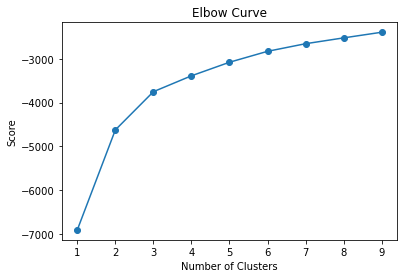

In [61]:
# Plot elbow curve using PyLab
pl.plot(num_cl, score_priv, marker = 'o')
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

I will use 3 clusters because it seems as though the last big 'jump' occurs from 2 to 3. After that, the line looks more horizontal.

## 03. K-means clustering

In [62]:
# Create kmeans object
kmeans_priv = KMeans(n_clusters = 3, n_jobs = -1)

In [63]:
# Fit object to the data
kmeans_priv.fit(priv_std)

/Users/taraperrigeold/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=3, n_jobs=-1)

In [64]:
# Create column with results of clustering
private['clusters'] = kmeans_priv.fit_predict(priv_std)

/Users/taraperrigeold/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


In [65]:
# Show output
private.head()

,AVG_COST,AVG_NET_PRICE,DEBT_MDN,FAMINC,ADM_RATE,SAT_AVG,NUM_STUDENTS,RET_RATE,PCT_WHITE,clusters
0,52176.0,25494.0,18500.0,86672.871041,0.5666,1232.0,1265.0,0.7769,0.7858,2
1,33944.0,25557.0,14925.0,36952.206116,0.5227,1069.0,2079.0,0.5611,0.4238,0
3,35685.0,20136.0,16250.0,53792.633136,0.5841,1100.0,1078.0,0.6602,0.6503,0
4,31735.0,16619.0,14112.0,28123.817955,0.4820,1054.0,259.0,0.5973,0.6988,0
6,35463.0,14611.0,19740.0,53850.791005,0.4704,1094.0,1294.0,0.7216,0.5796,0


In [66]:
# Get value counts of clusters
private['clusters'].value_counts()

0    332
2    315
1    121
Name: clusters, dtype: int64

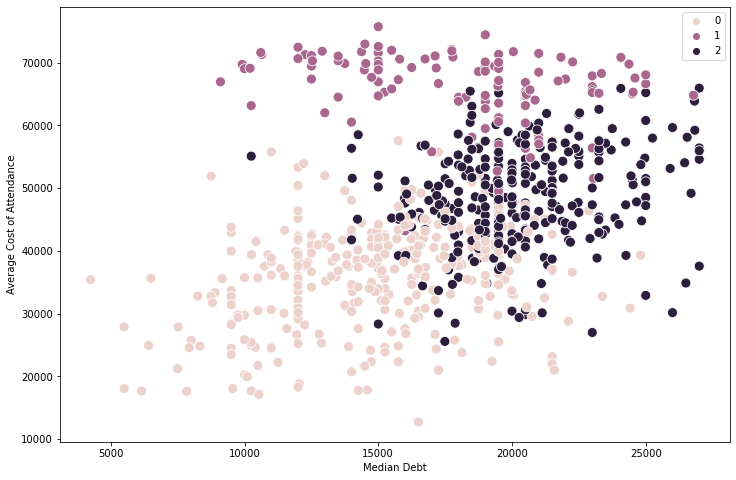

In [67]:
# Plot AVG_COST and DEBT_MDN
plt.figure(figsize = (12,8))
ax = sns.scatterplot(x = private['DEBT_MDN'], y = private['AVG_COST'], hue = kmeans_priv.labels_, s = 100)
ax.grid(False)
plt.xlabel('Median Debt')
plt.ylabel('Average Cost of Attendance')
plt.show()

The pink cluster (0) has the lowest median debt and lowest average cost of attendance in general. The dark purple cluster (2) has the highest median debt, and higher average cost of attendance than the pink cluster. The light purple cluster (1) has the highest average cost of attendance, but a wider range of median debt than the darkest purple cluster and not as low median debt as some of the pink cluster.

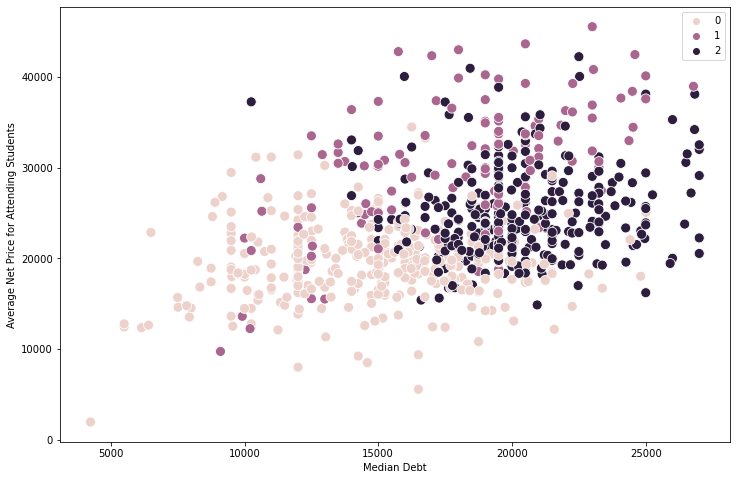

In [68]:
# Plot AVG_NET_PRICE and DEBT_MDN
plt.figure(figsize = (12,8))
ax = sns.scatterplot(x = private['DEBT_MDN'], y = private['AVG_NET_PRICE'], hue = kmeans_priv.labels_, s = 100)
ax.grid(False)
plt.xlabel('Median Debt')
plt.ylabel('Average Net Price for Attending Students')
plt.show()

This plot is similar to the previous one, just on a lower scale in terms of cost/price. The clusters remain relatively the same, except for the light purple cluster (1) which now has variation in average net price similar to the dark purple cluster (very different from having the highest average cost of attendance).

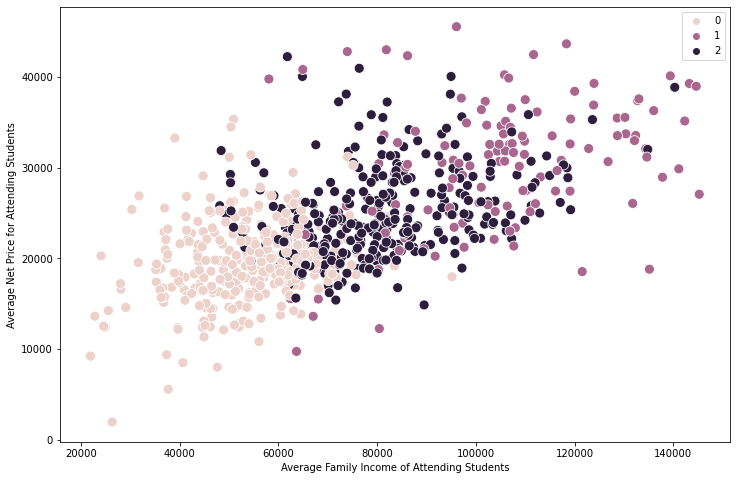

In [69]:
# Plot AVG_NET_PRICE and FAMINC
plt.figure(figsize = (12,8))
ax = sns.scatterplot(x = private['FAMINC'], y = private['AVG_NET_PRICE'], hue = kmeans_priv.labels_, s = 100)
ax.grid(False)
plt.xlabel('Average Family Income of Attending Students')
plt.ylabel('Average Net Price for Attending Students')
plt.show()

The pink cluster (0) has the lowest average family income and lowest average net price for attending. The light purple cluster (1) has the highest average family income and the highest average net price for attending. The dark purple cluster (2) remains in the middle in terms of average family income with some points higher and middle to high average net price of attending. Honestly, this is heartening because it tells us that lower income students don't have to pay as much for college, either due to government financial aid or assistance from the institution itself.

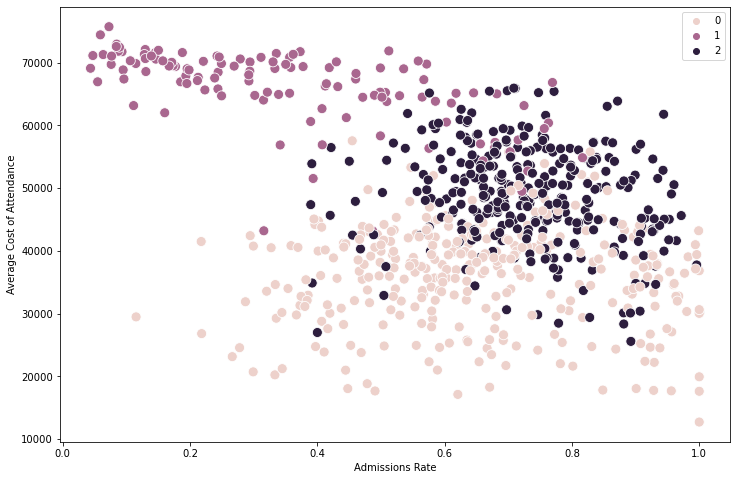

In [70]:
# Plot AVG_COST and ADM_RATE
plt.figure(figsize = (12,8))
ax = sns.scatterplot(x = private['ADM_RATE'], y = private['AVG_COST'], hue = kmeans_priv.labels_, s = 100)
ax.grid(False)
plt.xlabel('Admissions Rate')
plt.ylabel('Average Cost of Attendance')
plt.show()

The light purple cluster (1) has the highest average cost of attendance and the lowest admissions rates. The dark purple cluster (2) has higher admissions rate and higher average cost of attendance. The pink cluster (0) has higher admissions rate and lower average cost of attendance.

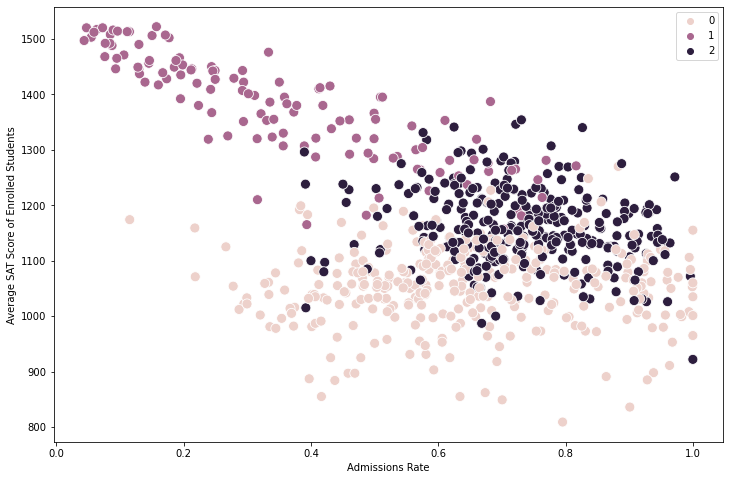

In [71]:
# Plot SAT_AVG and ADM_RATE
plt.figure(figsize = (12,8))
ax = sns.scatterplot(x = private['ADM_RATE'], y = private['SAT_AVG'], hue = kmeans_priv.labels_, s = 100)
ax.grid(False)
plt.xlabel('Admissions Rate')
plt.ylabel('Average SAT Score of Enrolled Students')
plt.show()

This plot is pretty similar to the previous one. The light purple cluster (1) has the lowest admissions rate and highest average SAT scores. The dark purple cluster (2) has higher admissions rates and higher average SAT scores. The pink cluster (0) has higher admissions rates and lower average SAT scores.

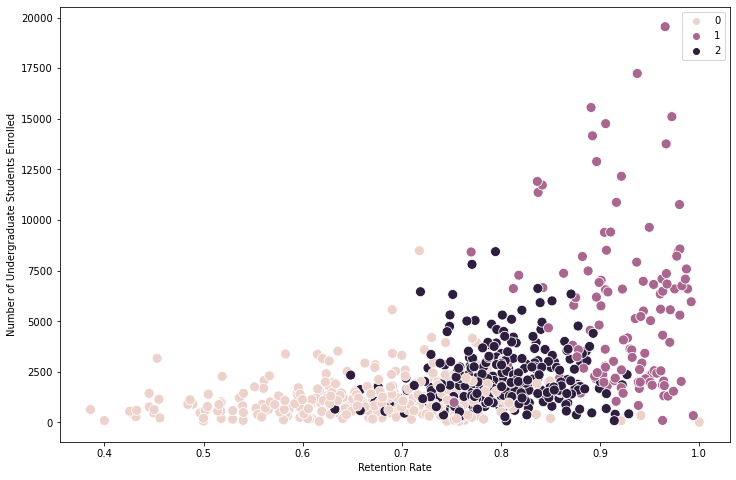

In [72]:
# Plot NUM_STUDENTS and RET_RATE
plt.figure(figsize = (12,8))
ax = sns.scatterplot(x = private['RET_RATE'], y = private['NUM_STUDENTS'], hue = kmeans_priv.labels_, s = 100)
ax.grid(False)
plt.xlabel('Retention Rate')
plt.ylabel('Number of Undergraduate Students Enrolled')
plt.show()

The pink cluster (0) has the lowest retention rates and the smallest number of undergrads. The dark purple cluster (2) has higher retention rates, but not the highest ones, and smaller number of undergrads. The light purple cluster (1) has the highest retention rates but a huge variety of number of undergrad students.

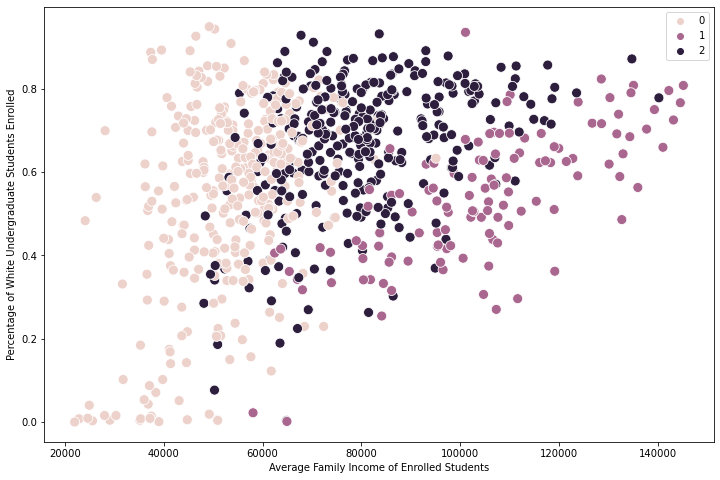

In [73]:
# Plot PCT_WHITE and FAMINC
plt.figure(figsize = (12,8))
ax = sns.scatterplot(x = private['FAMINC'], y = private['PCT_WHITE'], hue = kmeans_priv.labels_, s = 100)
ax.grid(False)
plt.xlabel('Average Family Income of Enrolled Students')
plt.ylabel('Percentage of White Undergraduate Students Enrolled')
plt.show()

The pink cluster (0) has the smallest average family income, but a large variety in percent of white undergrads. The dark purple cluster (2) has average family income mostly between 60000 and 100000 (solidly middle-class) and larger percentage of white undergrads (with some points at a lower percentage). The light purple cluster (1) has the highest average family income and the highest percentage of white undergrads.

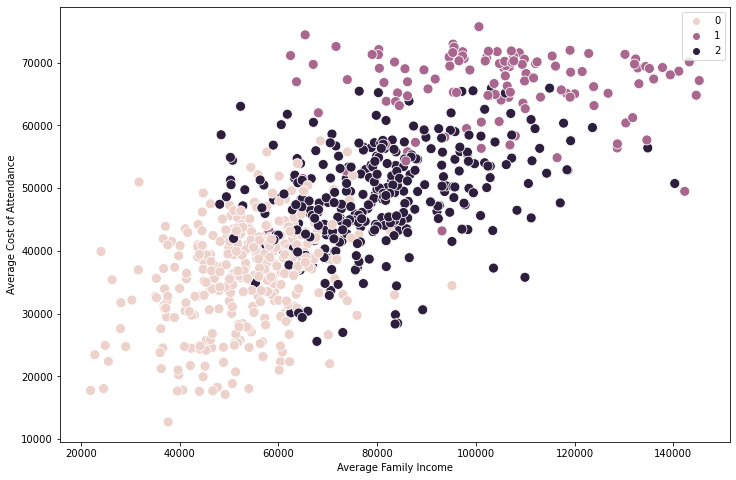

In [74]:
# Plot AVG_COST and FAMINC
plt.figure(figsize = (12,8))
ax = sns.scatterplot(x = private['FAMINC'], y = private['AVG_COST'], hue = kmeans_priv.labels_, s = 100)
ax.grid(False)
plt.xlabel('Average Family Income')
plt.ylabel('Average Cost of Attendance')
plt.show()

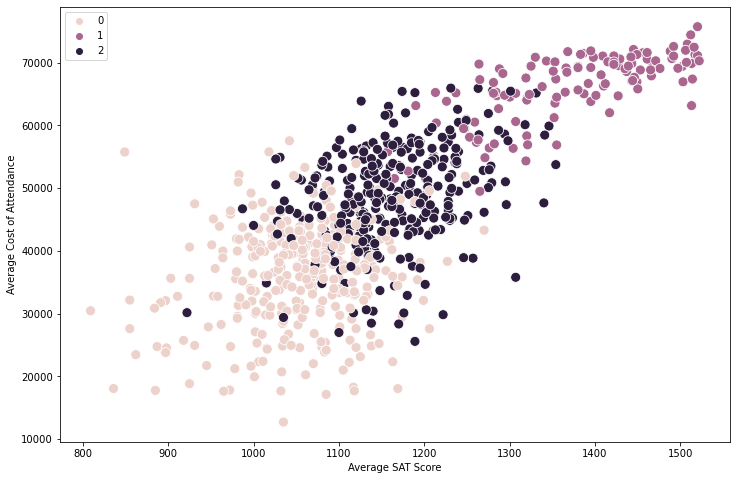

In [75]:
# Plot AVG_COST and SAT_AVG
plt.figure(figsize = (12,8))
ax = sns.scatterplot(x = private['SAT_AVG'], y = private['AVG_COST'], hue = kmeans_priv.labels_, s = 100)
ax.grid(False)
plt.xlabel('Average SAT Score')
plt.ylabel('Average Cost of Attendance')
plt.show()

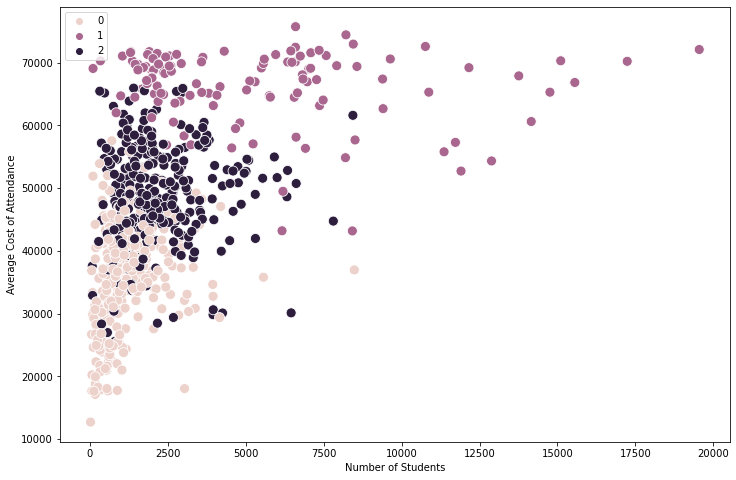

In [76]:
# Plot AVG_COST and NUM_STUDENTS
plt.figure(figsize = (12,8))
ax = sns.scatterplot(x = private['NUM_STUDENTS'], y = private['AVG_COST'], hue = kmeans_priv.labels_, s = 100)
ax.grid(False)
plt.xlabel('Number of Students')
plt.ylabel('Average Cost of Attendance')
plt.show()

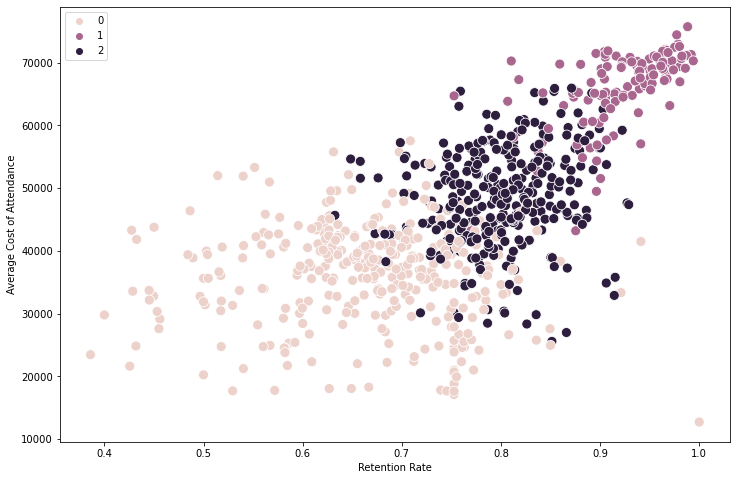

In [77]:
# Plot AVG_COST and RET_RATE
plt.figure(figsize = (12,8))
ax = sns.scatterplot(x = private['RET_RATE'], y = private['AVG_COST'], hue = kmeans_priv.labels_, s = 100)
ax.grid(False)
plt.xlabel('Retention Rate')
plt.ylabel('Average Cost of Attendance')
plt.show()

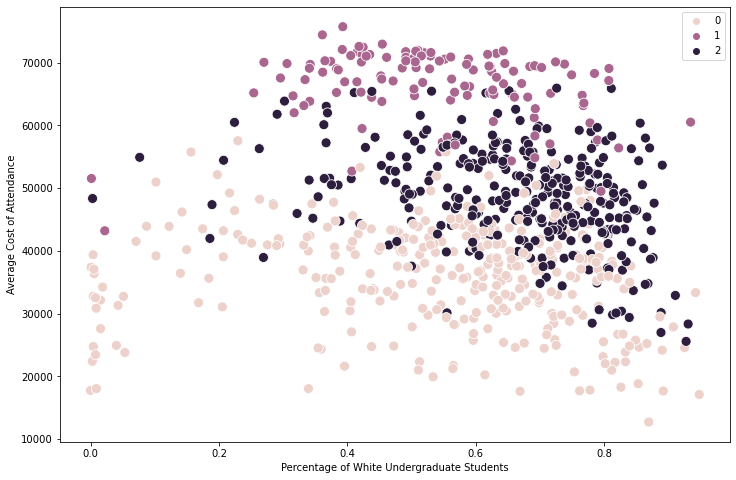

In [78]:
# Plot AVG_COST and PCT_WHITE
plt.figure(figsize = (12,8))
ax = sns.scatterplot(x = private['PCT_WHITE'], y = private['AVG_COST'], hue = kmeans_priv.labels_, s = 100)
ax.grid(False)
plt.xlabel('Percentage of White Undergraduate Students')
plt.ylabel('Average Cost of Attendance')
plt.show()

In [79]:
# Make new column of clusters based on color
private.loc[private['clusters'] == 2, 'cluster'] = 'dark purple'
private.loc[private['clusters'] == 1, 'cluster'] = 'light purple'
private.loc[private['clusters'] == 0, 'cluster'] = 'pink'

In [80]:
# Get descriptive stats for clusters
private.groupby('cluster').agg({'AVG_COST':['mean', 'median'],
                              'AVG_NET_PRICE':['mean', 'median'],
                              'DEBT_MDN':['mean', 'median'],
                              'FAMINC':['mean', 'median'],
                              'ADM_RATE':['mean', 'median'],
                              'SAT_AVG':['mean', 'median'],
                              'NUM_STUDENTS':['mean', 'median'],
                              'RET_RATE':['mean', 'median'],
                              'PCT_WHITE':['mean', 'median']})

AVG_COST          AVG_NET_PRICE               DEBT_MDN  \
                      mean   median          mean   median          mean   
cluster                                                                    
dark purple   48545.269841  48533.0  24845.031746  23921.0  20203.853968   
light purple  66097.611570  67670.0  30387.330579  30832.0  18027.975207   
pink          36119.870482  37237.5  19621.840361  19538.0  14821.337349   

                              FAMINC                 ADM_RATE          \
               median           mean         median      mean  median   
cluster                                                                 
dark purple   19981.0   80304.735198   79418.647334  0.730074  0.7284   
light purple  19000.0  104616.994145  105591.845790  0.351223  0.3304   
pink          15000.0   53556.429863   54026.542642  0.646125  0.6280   

                  SAT_AVG         NUM_STUDENTS          RET_RATE          \
                     mean  median         mean  median      mean  median   
cluster                                                                    
dark purple   1159.946032  1153.0  2131.498413  1810.0  0.800223  0.8007   
light purple  1376.834711  1387.0  5379.743802  4553.0  0.922165  0.9277   
pink          1053.936747  1057.5  1160.334337   937.5  0.664502  0.6728   

             PCT_WHITE          
                  mean  median  
cluster                         
dark purple   0.662743  0.6926  
light purple  0.539412  0.5441  
pink          0.548879  0.5978

The dark purple cluster seems to have the middle value for average cost of attendance, average net price, average SAT score, number of students, retention rate, and the highest median debt, admissions rate, and percentage of white undergrads.

The pink cluster seems to have the lowest average cost of attendance, average net price, median debt, average family income, average SAT score, number of students, retention rate, and the middle value for admissions rate, and has a similar low-ish percent of white undergrads to the purple cluster.

The light purple cluster seems to have the highest average cost of attendance, average net price, average family income, average SAT score, number of students, retention rate. It has the middle value for median debt, the lowest admissions rate, and has a similar low-ish percent of white undergrads to the pink cluster.

These clusters do seem to make sense. The light purple cluster is probably representative of the most elite private institutions. The dark purple is probably representative of small-to-medium sized liberal arts colleges that many middle- to upper-middle class white suburban students seem to like to attend. The pink cluster is probably representative of the other private institutions, ones who can't attract the best students (who also tend to be from wealthier families) and therefore can't ask for higher tuition money.

However, it's this pink cluster that doesn't make the most sense to me, so the institutions in that cluster should be studied further. 

First of all, it would be good to see if my assumptions are accurate, but also if they stand up and are relevant in terms of various other features from the original data set (for example, regarding receiving financial aid, but also repayment which can somewhat indicate the kind of employment students are able to find after graduation). Because private institutions cost so much more than public ones, it would be interesting to find out if graduates are able to get higher-paying jobs (although that doesn't necessarily mean they're happier in life, arguably much more important than salary - unfortunately this type of measurement is out of the scope of the data set). It would also be pretty interesting to see if certain private institutions (like the Ivy League and most elite schools, which I assume to be in the purple cluster) that brag about their financial aid packages to lower-income students actually can be backed up with data.

It's important to note that this was a very small data set (made smaller by removing so many missing values, although a larger dataset than for public institutions) with outliers removed, which likely had an impact on the results.